# Tratamento da base de dados

In [2]:
# Baseado em https://github.com/ChandraLingam/AmazonSageMakerCourse/tree/master/DeepAR/BikeRental
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
import numpy as np
import datetime

In [3]:
# https://www.kaggle.com/competitions/bike-sharing-demand/data
base = pd.read_csv('train.csv')
base

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
#as datetime serão os indices
base = pd.read_csv('train.csv', parse_dates=['datetime'], index_col=0)
base

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [5]:
base.drop(columns = ['season', 'holiday','workingday','weather','temp','atemp', 'humidity','windspeed','casual', 'registered'], axis=1, inplace = True)
base

,count
datetime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-19 19:00:00,336
2012-12-19 20:00:00,241
2012-12-19 21:00:00,168


In [6]:
# para agrupar por dia
base = base.groupby(pd.Grouper(freq = 'D')).sum()
base

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


In [7]:
base_teste = base.copy()
base_teste.shape

(719, 1)

In [8]:
base_treinamento = base.iloc[0:689,:]
base_treinamento

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-11-15,5445
2012-11-16,5698
2012-11-17,5629


In [9]:
# primeira e a ultima data 
base_treinamento.index.min(), base_treinamento.index.max()

(Timestamp('2011-01-01 00:00:00', freq='D'),
 Timestamp('2012-11-19 00:00:00', freq='D'))

In [10]:
# primeira e a ultima data 
base_teste.index.min(), base_teste.index.max()

(Timestamp('2011-01-01 00:00:00', freq='D'),
 Timestamp('2012-12-19 00:00:00', freq='D'))

In [11]:
dt_data_inicial = pd.Timestamp("2011-01-01", freq = 'D')
dt_data_final_treinamento = pd.Timestamp("2012-11-19", freq = 'D')
dt_previsao_maxima = pd.Timestamp("2012-12-19", freq = 'D')

faixa_treinamento = (dt_data_inicial, dt_data_final_treinamento)
faixa_teste = (dt_data_inicial, dt_previsao_maxima)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
faixa_treinamento

(Timestamp('2011-01-01 00:00:00', freq='D'),
 Timestamp('2012-11-19 00:00:00', freq='D'))

In [13]:
faixa_teste

(Timestamp('2011-01-01 00:00:00', freq='D'),
 Timestamp('2012-12-19 00:00:00', freq='D'))

In [14]:
serie_temporal_treinamento = []
serie_temporal_teste = []

serie_temporal_treinamento.append(base_treinamento[faixa_treinamento[0]:faixa_treinamento[1]]['count'])
serie_temporal_teste.append(base_teste[faixa_teste[0]:faixa_teste[1]]['count'])

In [15]:
type(serie_temporal_treinamento), type(serie_temporal_teste)

(list, list)

In [16]:
serie_temporal_treinamento

[datetime
 2011-01-01     985
 2011-01-02     801
 2011-01-03    1349
 2011-01-04    1562
 2011-01-05    1600
               ... 
 2012-11-15    5445
 2012-11-16    5698
 2012-11-17    5629
 2012-11-18    4669
 2012-11-19    5499
 Freq: D, Name: count, Length: 689, dtype: int64]

In [17]:
serie_temporal_teste

[datetime
 2011-01-01     985
 2011-01-02     801
 2011-01-03    1349
 2011-01-04    1562
 2011-01-05    1600
               ... 
 2012-12-15    5047
 2012-12-16    3786
 2012-12-17    4585
 2012-12-18    5557
 2012-12-19    5267
 Freq: D, Name: count, Length: 719, dtype: int64]

In [18]:
len(serie_temporal_treinamento[0]), len(serie_temporal_teste[0])

(689, 719)

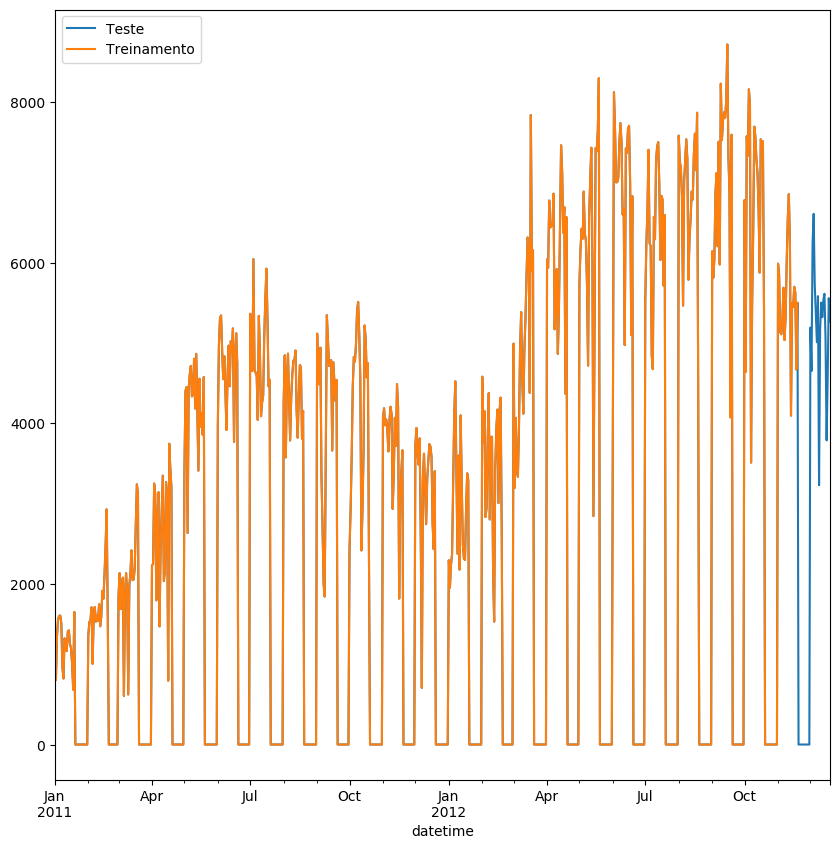

In [19]:
plt.figure(figsize=(10,10))
serie_temporal_teste[0].plot(label = "Teste")
serie_temporal_treinamento[0].plot(label = "Treinamento")
plt.legend()
plt.show()

In [20]:
# receberá uma serie temporal
#se um um numero retornará um x senão Nan
def encode_target(ts):
    return [x if np.isfinite(x) else "NaN" for x in ts]

In [21]:
encode_target(serie_temporal_treinamento[0][0:25])

[985,
 801,
 1349,
 1562,
 1600,
 1606,
 1510,
 959,
 822,
 1321,
 1263,
 1162,
 1406,
 1421,
 1248,
 1204,
 1000,
 683,
 1650,
 0,
 0,
 0,
 0,
 0,
 0]

In [22]:
def series_to_obj(ts):
    obj = {"start": str(ts.index[0]), "target": encode_target(ts)}
    return obj

In [23]:
series_to_obj(serie_temporal_treinamento[0][0:5])

{'start': '2011-01-01 00:00:00', 'target': [985, 801, 1349, 1562, 1600]}

In [24]:
def series_to_jsonline(ts):
    return json.dumps(series_to_obj(ts))

In [25]:
# passando para o tipo de json
series_to_jsonline(serie_temporal_treinamento[0][0:5])

'{"start": "2011-01-01 00:00:00", "target": [985, 801, 1349, 1562, 1600]}'

In [26]:
encoding = 'utf-8'
arquivo_json_treinamento = 'train.json'
arquivo_json_teste = 'test.json'

# abrindo o arquivo json, percorrendo a serie temporal e escrevendo em formatado json
with open(arquivo_json_treinamento, 'wb') as fp:
    for ts in serie_temporal_treinamento:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

with open(arquivo_json_teste, 'wb') as fp:
    for ts in serie_temporal_teste:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

# Configurações do SageMaker

In [27]:
import boto3
import sagemaker

In [28]:
session = sagemaker.Session()
role = sagemaker.get_execution_role()
job_name = 'deepar-bike'
bucket = 'cursoawssagemakersp'
subpasta_dataset = 'datasets/bike'
subpasta_modelo = 'modelos/bike/deepar'
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, 'train.json')
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, subpasta_dataset, 'test.json')
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)

print('Role: {}'.format(role))
print('Localização da base de treinamento: {}'.format(s3_train_data))
print('Localização da base de teste: {}'.format(s3_test_data))
print('Modelo será salvo em: {}'.format(output_location))

Role: arn:aws:iam::605390214759:role/service-role/AmazonSageMaker-ExecutionRole-20230311T091643
Localização da base de treinamento: s3://cursoawssagemakersp/datasets/bike/train/train.json
Localização da base de teste: s3://cursoawssagemakersp/datasets/bike/test/test.json
Modelo será salvo em: s3://cursoawssagemakersp/modelos/bike/deepar/output


In [29]:
# criar os arquivos no s3
def escreve_s3(arquivo, bucket, nome):
    with open(arquivo, 'rb') as f:
        return boto3.Session().resource('s3').Bucket(bucket).Object(nome).upload_fileobj(f)

In [30]:
escreve_s3('train.json', bucket, os.path.join(subpasta_dataset, 'train', 'train.json'))
escreve_s3('test.json', bucket, os.path.join(subpasta_dataset, 'test', 'test.json'))

In [31]:
# caminhao train
print(os.path.join(subpasta_dataset, 'train', 'train.json'))
# caminhao teste
print(os.path.join(subpasta_dataset, 'test', 'test.json'))

datasets/bike/train/train.json
datasets/bike/test/test.json


# Treinamento do DeepAR

In [32]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/ecr-sa-east-1.html
container = sagemaker.image_uris.retrieve(framework = 'forecasting-deepar', region = session.boto_region_name)

In [33]:
# https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html
# https://github.com/aws-samples/amazon-sagemaker-managed-spot-training/blob/main/xgboost_built_in_managed_spot_training_checkpointing/xgboost_built_in_managed_spot_training_checkpointing.ipynb
deepar = sagemaker.estimator.Estimator(image_uri = container,
                                       role = role,
                                       instance_count = 1,
                                       instance_type = 'ml.m5.large',
                                       output_path = output_location,
                                       sagemaker_session = session,
                                       base_job_name = job_name,
                                       use_spot_instances = True,
                                       max_run = 3600,
                                       max_wait = 3600)

In [34]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/deepar_hyperparameters.html
freq = 'D'
prediction_length = 30
context_length = 30

In [35]:
hyperparametros = {
    'time_freq': freq,
    'epochs': "20",
    'context_length': str(context_length),
    'prediction_length': str(prediction_length)
}

In [36]:
deepar.set_hyperparameters(**hyperparametros)

In [37]:
data_channels = {'train': s3_train_data, 'test': s3_test_data}
data_channels

{'train': 's3://cursoawssagemakersp/datasets/bike/train/train.json',
 'test': 's3://cursoawssagemakersp/datasets/bike/test/test.json'}

In [38]:
deepar.fit(inputs = data_channels)

INFO:sagemaker:Creating training-job with name: deepar-bike-2023-03-24-12-18-56-054


2023-03-24 12:18:58 Starting - Starting the training job...
2023-03-24 12:19:14 Starting - Preparing the instances for training.........
2023-03-24 12:20:53 Downloading - Downloading input data...
2023-03-24 12:21:28 Training - Downloading the training image......
2023-03-24 12:22:24 Training - Training image download completed. Training in progress.Arguments: train
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:78: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
/opt/amazon/lib/python3.8/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[03/24/2023 12:22:30 INFO 140238720345920] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'_kvstore': 'auto', '_num_gpus

# Deploy e previsões

In [39]:
job_name = deepar.latest_training_job.name
print('Job name: ', job_name)

Job name:  deepar-bike-2023-03-24-12-18-56-054


In [40]:
endpoint = session.endpoint_from_job(job_name = job_name,
                                     initial_instance_count = 1,
                                     instance_type = "ml.m5.large",
                                     image_uri = container,
                                     role = role)

INFO:sagemaker:Creating model with name: deepar-bike-2023-03-24-12-18-56-054
INFO:sagemaker:Creating endpoint-config with name deepar-bike-2023-03-24-12-18-56-054
INFO:sagemaker:Creating endpoint with name deepar-bike-2023-03-24-12-18-56-054


-----!

In [41]:
print('Endpoint: ', endpoint)

Endpoint:  deepar-bike-2023-03-24-12-18-56-054


In [42]:
class DeepARPredictor(sagemaker.predictor.Predictor):

    def set_prediction_parameters(self, freq, prediction_length):
        """Set the time frequency and prediction length parameters. 
          This method **must** be called before being able to use `predict`.
        
        Parameters:
        freq -- string indicating the time frequency
        prediction_length -- integer, number of predicted time points
        
        Return value: none.
        """
        self.freq = freq
        self.prediction_length = prediction_length
        
    def predict(self, ts, cat=None, dynamic_feat=None, 
                encoding="utf-8", num_samples=100, quantiles=["0.1", "0.5", "0.9"]):
        """Requests the prediction of for the time series listed in `ts`, 
           each with the (optional) corresponding category listed in `cat`.
        
        Parameters:
        ts -- list of `pandas.Series` objects, the time series to predict
        cat -- list of integers (default: None)
        encoding -- string, encoding to use for the request (default: "utf-8")
        num_samples -- integer, number of samples to compute at prediction time (default: 100)
        quantiles -- list of strings specifying the quantiles to compute (default: ["0.1", "0.5", "0.9"])
        
        Return value: list of `pandas.DataFrame` objects, each containing the predictions
        """
        prediction_times = [x.index[-1] + datetime.timedelta(hours=1) for x in ts] 
        
        req = self.__encode_request(ts, cat, dynamic_feat, encoding, num_samples, quantiles)
        res = super(DeepARPredictor, self).predict(req)
        return self.__decode_response(res, prediction_times, encoding)
    
    def __encode_request(self, ts, cat, dynamic_feat, encoding, num_samples, quantiles):
        
        instances = [series_to_obj(ts[k]) for k in range(len(ts))]
        
        configuration = {"num_samples": num_samples, "output_types": ["quantiles"], "quantiles": quantiles}
        http_request_data = {"instances": instances, "configuration": configuration}
        return json.dumps(http_request_data).encode(encoding)
    
    def __decode_response(self, response, prediction_times, encoding):
        response_data = json.loads(response.decode(encoding))
        list_of_df = []
        for k in range(len(prediction_times)):
            prediction_index = pd.date_range(start=prediction_times[k], freq=self.freq, periods=self.prediction_length)
            list_of_df.append(pd.DataFrame(data=response_data['predictions'][k]['quantiles'], index=prediction_index))
        return list_of_df

In [49]:
predictor = DeepARPredictor(endpoint_name = 'deepar-bike-2023-03-24-12-18-56-054',
                            sagemaker_session = session)
predictor.set_prediction_parameters(freq, prediction_length)
predictor.serializer.content_type = "application/json"

In [50]:
previsoes = predictor.predict(serie_temporal_treinamento)

In [57]:
len(previsoes[0])

30

In [52]:
previsoes

[                             0.1          0.5          0.9
 2012-11-19 01:00:00   111.584229   921.611511  1709.092285
 2012-11-20 01:00:00  -434.704254  -150.003693   123.766541
 2012-11-21 01:00:00  -190.550262   -84.852264    49.981014
 2012-11-22 01:00:00   -88.809830   -29.323154    60.221302
 2012-11-23 01:00:00  -120.288956   -53.598740     1.654831
 2012-11-24 01:00:00  -120.254959   -62.113014     4.661034
 2012-11-25 01:00:00   -78.181572   -15.171663    64.622902
 2012-11-26 01:00:00  -127.588020   -77.229042    -2.739670
 2012-11-27 01:00:00  -214.949677   -80.840912    27.113136
 2012-11-28 01:00:00  -146.098953   -26.845678   134.267029
 2012-11-29 01:00:00   -95.595383   236.747284   655.611633
 2012-11-30 01:00:00  1151.727417  2131.217773  3617.472168
 2012-12-01 01:00:00  2889.052734  4325.695801  6304.942383
 2012-12-02 01:00:00  3759.012207  5520.679688  7456.511719
 2012-12-03 01:00:00  4010.742188  6048.187988  7805.772461
 2012-12-04 01:00:00  4250.365234  5830.

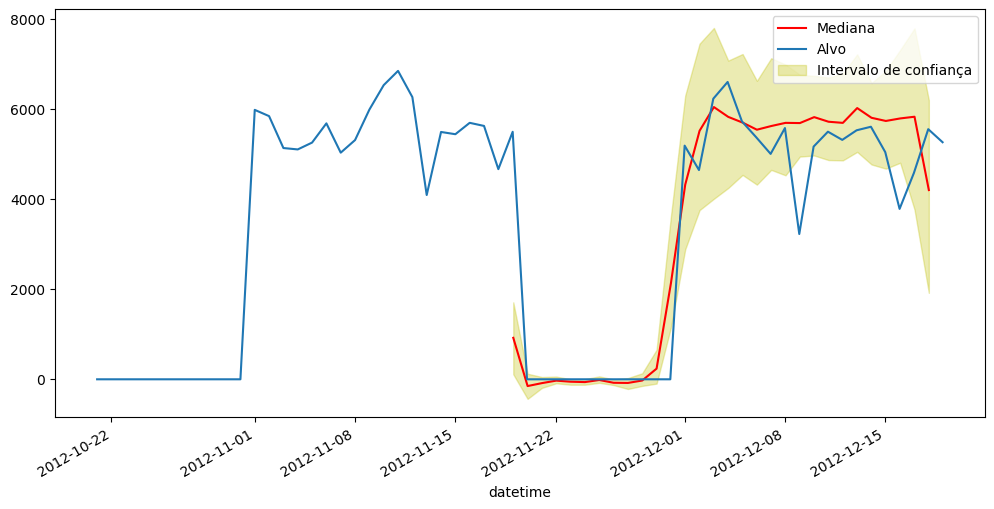

In [59]:
for k in range(len(previsoes)):
    plt.figure(figsize=(12,6))
    previsoes[k]['0.5'].plot(label = 'Mediana', color = 'red')
    #serie_temporal_teste[k].plot(label = 'Alvo')
    serie_temporal_teste[k][-prediction_length - context_length:].plot(label = 'Alvo')
    p10 = previsoes[k]['0.1']
    p90 = previsoes[k]['0.9']
    plt.fill_between(p10.index, p10, p90, color = 'y', alpha = 0.3, label = 'Intervalo de confiança')
    plt.legend()
    plt.show()

In [54]:
df_teste = base.iloc[689:,:]
len(df_teste)

30

In [55]:
df_teste

,count
datetime,
2012-11-20,0
2012-11-21,0
2012-11-22,0
2012-11-23,0
2012-11-24,0
2012-11-25,0
2012-11-26,0
2012-11-27,0
2012-11-28,0


In [79]:
previsoes2 = previsoes[0]['0.5'].values
previsoes2

array([1021.14703369, -126.18373108,  -62.93225098,  -10.40964127,
        -38.68906403,  -45.84260178,    8.27722645,  -50.41740799,
        -61.40195847,  -40.22240448,  285.66772461, 2135.74121094,
       4239.02148438, 5567.34863281, 5737.73291016, 5699.87792969,
       5529.66015625, 5640.21337891, 5621.30224609, 5593.93701172,
       5710.78173828, 5814.34619141, 5631.15917969, 5810.91992188,
       5948.39208984, 5705.53564453, 5719.68164062, 5766.33740234,
       5775.59228516, 4414.26025391])

In [80]:
esperado = df_teste['count'].values
esperado

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       5191, 4649, 6234, 6606, 5729, 5375, 5008, 5582, 3228, 5170, 5501,
       5319, 5532, 5611, 5047, 3786, 4585, 5557, 5267])

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(esperado, previsoes2)
mse = mean_squared_error(esperado, previsoes2)
print('MAE: ', mae, '\nMSE: ', mse)

MAE:  553.3355836550468 
MSE:  830120.1140067634
